l2_ready 0.8665599132507464
l0_ready 2.7056081010771758


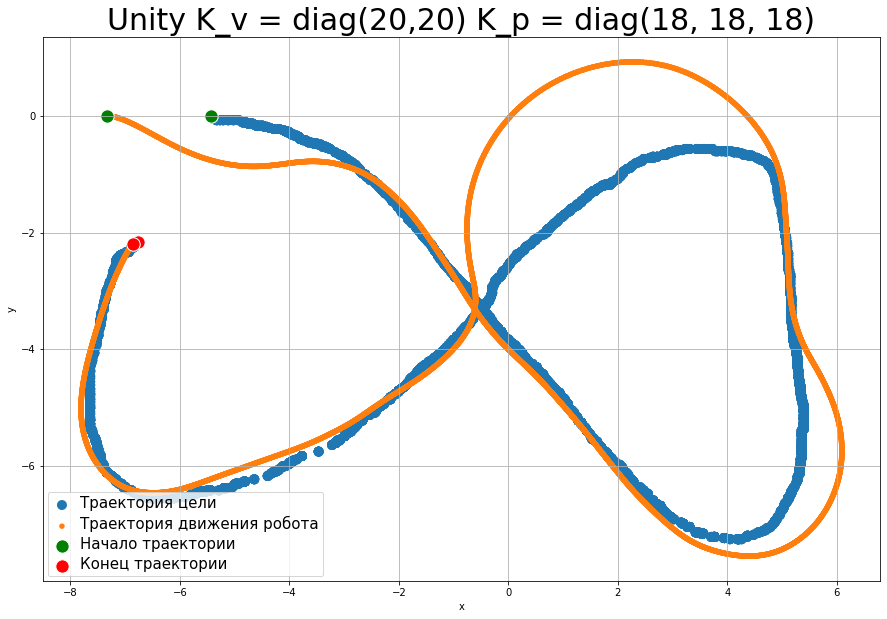

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_cube = pd.read_csv('./data/plots_data/traectory_goal.csv', sep=' ', decimal=',')

# df_matrix = pd.read_csv('./data/coord_Matrix.csv', sep=' ')
df_matrix = pd.read_csv('./data/plots_data/Matrix_20_20_18_18_18.csv', sep=' ', decimal=',')

def crop_data(df_l, df_r):
    if df_l.shape[0] > df_r.shape[0]:
        return (df_l.head(df_r.shape[0]),df_r)
    elif df_l.shape[0] < df_r.shape[0]:
        return (df_l, df_r.head(df_l.shape[0]))
    else: return (df_l,df_r)

df_l, df_r = crop_data(df_cube, df_matrix)


# L2

def l2(df_l,df_r):
    def l2_(row):
        x_l = row['x_l']
        y_l = row['y_l']
        x_r = row['x_r']
        y_r = row['y_r']

        d_1 = (x_l - x_r) ** 2
        d_2 = (y_l - y_r) ** 2
    
        return d_1 + d_2

    df_total = pd.concat([df_l,df_r], axis = 1)
    df_total.columns = ['x_l','y_l','time_l','x_r','y_r','time_r']
    df_total = df_total.drop(['time_l','time_r'], axis = 1)

    df_total['l2'] = df_total.apply(l2_,axis=1)

    return np.sqrt(df_total['l2'].sum() / (df_total.shape[0] * 2))

def l_inf(df_l, df_r):
    def l0(row):
        x_l = row['x_l']
        y_l = row['y_l']
        x_r = row['x_r']
        y_r = row['y_r']
    
        return np.linalg.norm(np.array([x_l,y_l]) - np.array([x_r,y_r]))

    df_total = pd.concat([df_l,df_r], axis = 1)
    df_total.columns = ['x_l','y_l','time_l','x_r','y_r','time_r']
    df_total = df_total.drop(['time_l','time_r'], axis = 1)

    df_total['l0'] = df_total.apply(l0,axis=1)
    
    return df_total['l0'].max()

print("l2_ready", l2(df_l,df_r))
print("l0_ready", l_inf(df_l,df_r))

# coordinates = pd.concat([x,y],axis = 1)
# coordinates['time'] = [t for t in range(1,coordinates.shape[0]+1)]

markers = ('o', 'v')

plt.figure(figsize=(15,10))
ax=sns.scatterplot(data = df_cube, x='x', y = 'y', s = 100,edgecolor="none")
sns.scatterplot(data = df_matrix, x='x', y = 'y', s = 30,edgecolor="none")



sns.scatterplot(data = (pd.DataFrame([df_cube.iloc[0],df_matrix.iloc[0]])), x='x', y = 'y', s = 180,facecolor='green')
sns.scatterplot(data = (pd.DataFrame([df_cube.iloc[-1],df_matrix.iloc[-1]])), x='x', y = 'y', s = 180,facecolor='red')

plt.legend(['Траектория цели','Траектория движения робота','Начало траектории','Конец траектории'], loc="lower left")
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.title("Unity K_v = diag(20,20) K_p = diag(18, 18, 18)" ,fontsize=30)
plt.grid()
plt.savefig('data/plots/Matrix_20_20_18_18_18.pdf')
# sns.scatterplot(data = df_matrix_no, x='x', y = 'y')
# df_matrix

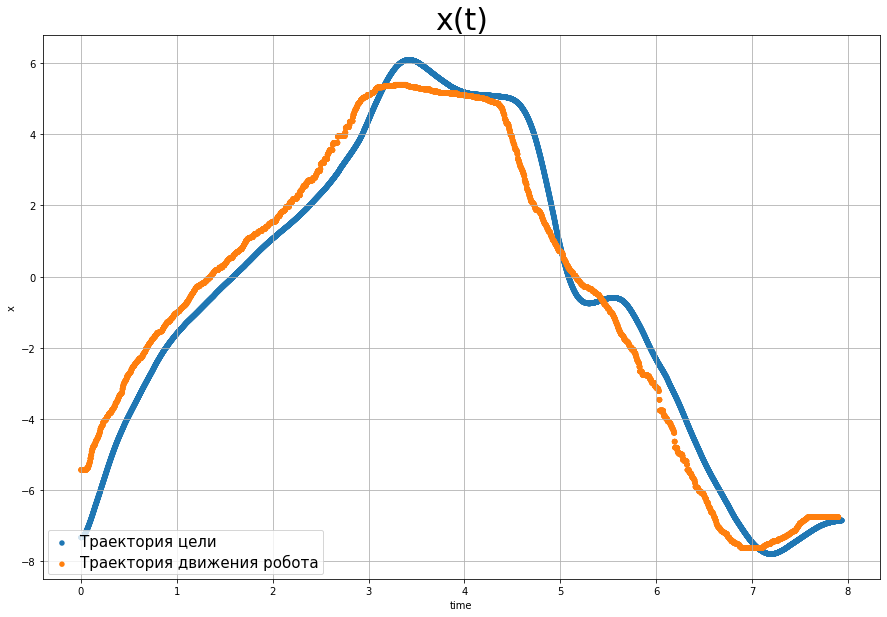

In [18]:
plt.figure(figsize=(15,10))
a1=sns.scatterplot(data = df_matrix, x='time', y = 'x', s = 30,edgecolor="none")
sns.scatterplot(data = df_cube, x='time', y = 'x', s = 30,edgecolor="none")
plt.grid()
plt.legend(['Траектория цели','Траектория движения робота'], loc="lower left")
plt.setp(a1.get_legend().get_texts(), fontsize='15') # for legend text
plt.title("x(t)" ,fontsize=30)

plt.savefig('data/plots/Matrix_20_20_18_18_18_x.pdf')

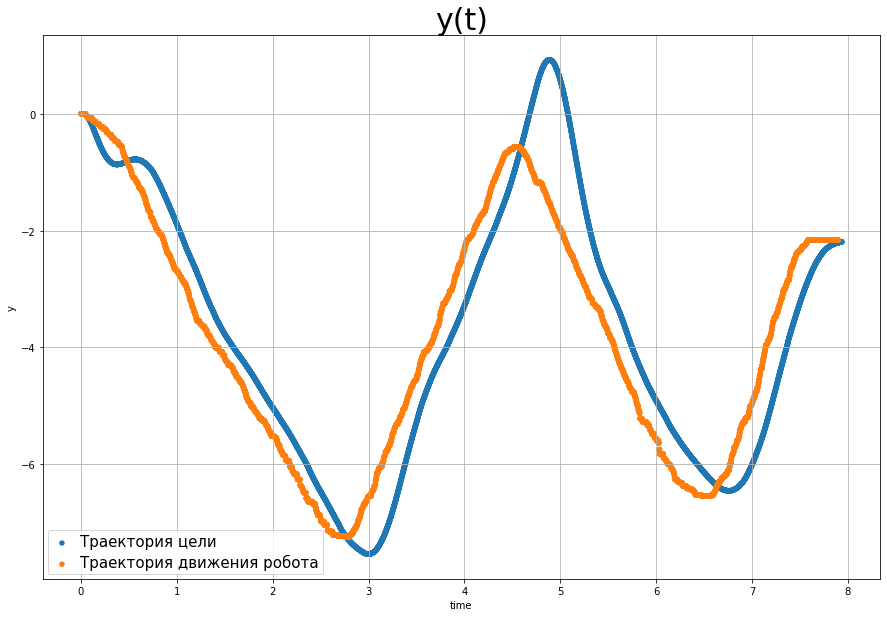

In [19]:
plt.figure(figsize=(15,10))
a2=sns.scatterplot(data = df_matrix, x='time', y = 'y', s = 30,edgecolor="none")
sns.scatterplot(data = df_cube, x='time', y = 'y', s = 30,edgecolor="none")
plt.legend(['Траектория цели','Траектория движения робота'], loc="lower left")
plt.grid()
plt.setp(a2.get_legend().get_texts(), fontsize='15') # for legend text
plt.title("y(t)" ,fontsize=30)

plt.savefig('data/plots/Matrix_20_20_18_18_18_y.pdf')

In [5]:
df_cube = pd.read_csv('./data/plots_data/traectory_goal.csv', sep=' ', decimal=',')
names = ["Matrix_40_40_42_42_42","Matrix_40_40_45_45_45", "Matrix_20_20_18_18_18", "NoMatrix_3,5_0,7", "NoMatrix_4,5_1", "NoMatrix_4_0,5", "Python_3,2_0,3", "Python_3,5_0,7", "Python_3,5_1,5", "Python_4,2_0,7", "Python_4,5_1", "Python_4_0,5"]
for name in names:

    df_matrix = pd.read_csv(f"data/plots_data/{name}.csv", sep=' ', decimal=',')
    df_l, df_r = crop_data(df_cube, df_matrix)
    print(f"{name} l2_ready", l2(df_l,df_r))
#     print(f"{name} l0_ready", l_inf(df_l,df_r))

Matrix_40_40_42_42_42 l2_ready 0.6452966646266888
Matrix_40_40_45_45_45 l2_ready 0.5996776241112192
Matrix_20_20_18_18_18 l2_ready 0.8665599132507464
NoMatrix_3,5_0,7 l2_ready 0.8043237240271219
NoMatrix_4,5_1 l2_ready 0.5811877715169449
NoMatrix_4_0,5 l2_ready 1.0750381851852762
Python_3,2_0,3 l2_ready 1.20201746321341
Python_3,5_0,7 l2_ready 0.9276586230782693
Python_3,5_1,5 l2_ready 0.5370231607718995
Python_4,2_0,7 l2_ready 0.6706701115118378
Python_4,5_1 l2_ready 0.6092650663095684
Python_4_0,5 l2_ready 0.8540538899252936
